In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, train
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
RANDOM_STATE=42
df= pd.read_csv ('C:/Users/hello/Downloads/archive (3)/weather_classification_data.csv')
print(df.shape)
null_counts = df.isnull().sum()
print("Number of null values in each column:\n", null_counts)

(13200, 11)
Number of null values in each column:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [5]:
cat_variables=['Cloud Cover','Season','Location']
df=pd.get_dummies(data=df, prefix= cat_variables, columns= cat_variables)
x= df.drop('Weather Type', axis=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Weather Type'])
x_train,x_,y_train,y_= train_test_split(x, y_encoded, test_size=0.4, random_state=RANDOM_STATE)
x_cv,x_test,y_cv,y_test= train_test_split(x_, y_, test_size=0.5, random_state=RANDOM_STATE)
print(x_train.shape, x_cv.shape,x_test.shape)

(7920, 18) (2640, 18) (2640, 18)


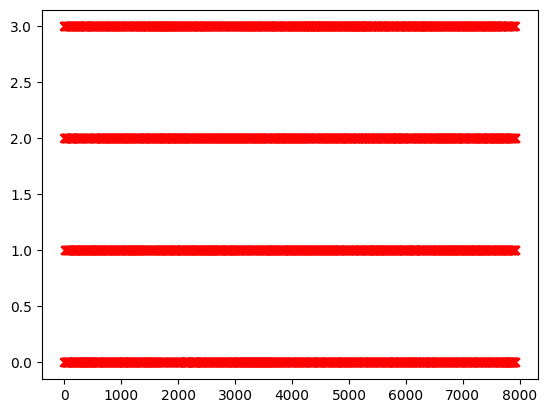

In [13]:

plt.scatter(range(len(x_train)), y_train, marker='x',c='r')
plt.show()

In [14]:
n = int(len(x_train)*0.8) 
x_train_,x_train_eval, y_train_,y_train_eval=x_train[:n],x_train[n:], y_train[:n],y_train[n:]
model = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    early_stopping_rounds = 10,
    verbosity = 1, random_state = RANDOM_STATE
)


model.fit(
    x_train,
    y_train,
    eval_set=[(x_train_eval, y_train_eval)],  
    
    verbose=True  
)

[0]	validation_0-mlogloss:1.21383
[1]	validation_0-mlogloss:1.07494
[2]	validation_0-mlogloss:0.96003
[3]	validation_0-mlogloss:0.86239
[4]	validation_0-mlogloss:0.77859
[5]	validation_0-mlogloss:0.70552
[6]	validation_0-mlogloss:0.64151
[7]	validation_0-mlogloss:0.58552
[8]	validation_0-mlogloss:0.53607
[9]	validation_0-mlogloss:0.49175
[10]	validation_0-mlogloss:0.45234
[11]	validation_0-mlogloss:0.41720
[12]	validation_0-mlogloss:0.38586
[13]	validation_0-mlogloss:0.35816
[14]	validation_0-mlogloss:0.33295
[15]	validation_0-mlogloss:0.31014
[16]	validation_0-mlogloss:0.28968
[17]	validation_0-mlogloss:0.27118
[18]	validation_0-mlogloss:0.25450
[19]	validation_0-mlogloss:0.23942
[20]	validation_0-mlogloss:0.22545
[21]	validation_0-mlogloss:0.21291
[22]	validation_0-mlogloss:0.20155
[23]	validation_0-mlogloss:0.19123
[24]	validation_0-mlogloss:0.18194
[25]	validation_0-mlogloss:0.17342
[26]	validation_0-mlogloss:0.16560
[27]	validation_0-mlogloss:0.15830
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
model.best_iteration

99

In [20]:
print(f"Metrics train: Accuracy score: {accuracy_score(model.predict(x_train),y_train):.4f}")
print(f"Metrics test: Accuracy score: {accuracy_score(model.predict(x_cv),y_cv):.4f}")


Metrics train: Accuracy score: 0.9946
Metrics test: Accuracy score: 0.9155


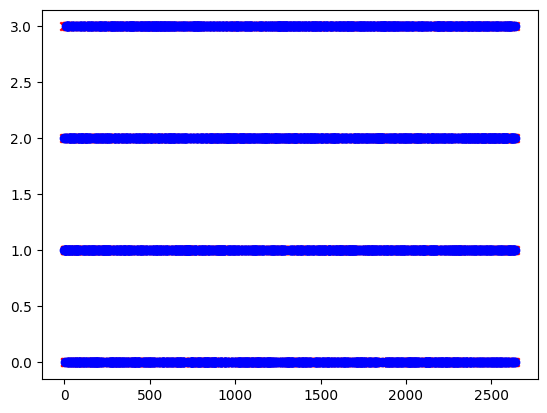

In [22]:
mod=model.predict(x_test)
plt.scatter(range(len(x_test)), y_test, marker='x',c='r')
plt.scatter(range(len(mod)), mod, marker='o',c='b')
plt.show()